In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

import gensim
from gensim.models import Word2Vec

import re
import bs4 as bs
import urllib.request


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Fetch and parse article data from a Wikipedia page on "Machine Learning"
scraped_data = urllib.request.urlopen("https://en.wikipedia.org/wiki/Machine_learning")
article = scraped_data.read()

# Parsing the article with BeautifulSoup
parsed_article = bs.BeautifulSoup(article, 'lxml')
paragraphs = parsed_article.find_all('p')

# Concatenate all paragraphs into a single string
article_text = ""
for p in paragraphs:
    article_text += p.text

# Print extracted article text to verify content
print(article_text)


Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data, and thus perform tasks without explicit instructions.[1] Advances in the field of deep learning have allowed neural networks to surpass many previous approaches in performance.[2]
ML finds application in many fields, including natural language processing, computer vision, speech recognition, email filtering, agriculture, and medicine.[3][4] The application of ML to business problems is known as predictive analytics.
Statistics and mathematical optimization (mathematical programming) methods comprise the foundations of machine learning. Data mining is a related field of study, focusing on exploratory data analysis (EDA) via unsupervised learning.[6][7]
From a theoretical viewpoint, probably approximately correct (PAC) learning provides a framework for describing machine learning.
The term machine l

In [3]:
# Replace special characters with spaces and remove single-letter words
sentences = re.sub('[^A-Za-z0-9]+', ' ', article_text)
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()
sentences = sentences.lower()

# Print preprocessed text
print(sentences)


machine learning ml is field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalize to unseen data and thus perform tasks without explicit instructions advances in the field of deep learning have allowed neural networks to surpass many previous approaches in performance ml finds application in many fields including natural language processing computer vision speech recognition email filtering agriculture and medicine 4 the application of ml to business problems is known as predictive analytics statistics and mathematical optimization mathematical programming methods comprise the foundations of machine learning data mining is related field of study focusing on exploratory data analysis eda via unsupervised learning 7 from theoretical viewpoint probably approximately correct pac learning provides framework for describing machine learning the term machine learning was coined in 1959 by arthur samuel an

In [4]:
# Tokenize sentences and then words
all_sentences = sent_tokenize(sentences)
all_words = [word_tokenize(sent) for sent in all_sentences]

# Remove stopwords from each sentence
stop_words = set(stopwords.words('english'))
processed_words = [[word for word in words if word not in stop_words] for words in all_words]

# Verify processed words
print(processed_words[:5])


[['machine', 'learning', 'ml', 'field', 'study', 'artificial', 'intelligence', 'concerned', 'development', 'study', 'statistical', 'algorithms', 'learn', 'data', 'generalize', 'unseen', 'data', 'thus', 'perform', 'tasks', 'without', 'explicit', 'instructions', 'advances', 'field', 'deep', 'learning', 'allowed', 'neural', 'networks', 'surpass', 'many', 'previous', 'approaches', 'performance', 'ml', 'finds', 'application', 'many', 'fields', 'including', 'natural', 'language', 'processing', 'computer', 'vision', 'speech', 'recognition', 'email', 'filtering', 'agriculture', 'medicine', '4', 'application', 'ml', 'business', 'problems', 'known', 'predictive', 'analytics', 'statistics', 'mathematical', 'optimization', 'mathematical', 'programming', 'methods', 'comprise', 'foundations', 'machine', 'learning', 'data', 'mining', 'related', 'field', 'study', 'focusing', 'exploratory', 'data', 'analysis', 'eda', 'via', 'unsupervised', 'learning', '7', 'theoretical', 'viewpoint', 'probably', 'appro

In [5]:
# Train Word2Vec model on processed data
model = Word2Vec(processed_words, min_count=1, vector_size=52, window=5)

# Display vocabulary
vocabulary = model.wv.index_to_key
print("Vocabulary:", vocabulary)


Vocabulary: ['learning', 'machine', 'data', 'model', 'training', 'algorithms', 'used', 'set', 'artificial', 'algorithm', 'models', 'ai', 'methods', 'systems', 'also', 'based', 'examples', 'field', 'example', 'neural', 'classification', 'supervised', 'input', 'many', 'theory', 'often', 'feature', 'one', 'unsupervised', 'using', 'networks', 'called', 'process', 'may', 'techniques', 'knowledge', 'system', 'trained', 'new', 'compression', 'analysis', 'problems', 'network', 'decision', 'research', 'human', 'function', 'time', 'computer', 'performance', 'output', 'regression', 'predictions', 'approaches', 'rule', 'neurons', 'perform', 'signal', 'represented', 'image', 'intelligence', 'including', 'mining', 'features', 'given', 'known', 'include', 'detection', 'variables', 'learned', 'method', 'biases', 'make', 'use', 'mathematical', 'tasks', 'related', 'statistical', 'learn', 'deep', 'linear', 'software', 'reinforcement', 'statistics', 'dictionary', 'rules', 'class', 'programming', 'decision

In [7]:
# Define a word and find similar words in the model's vocabulary
word = 'overfitting'
similar_words = model.wv.most_similar(word)

# Print similar words
for similar_word in similar_words:
    print(similar_word)


('belief', 0.5328319072723389)
('optimization', 0.4294799268245697)
('item', 0.41170400381088257)
('search', 0.40359005331993103)
('combining', 0.4029344618320465)
('mental', 0.38940632343292236)
('cheaper', 0.3693182170391083)
('manifold', 0.3673855662345886)
('commercial', 0.3651510775089264)
('condenses', 0.36506715416908264)


In [8]:
# Prepare context-target pairs for training a neural network
data = processed_words[0]  # Using the first sentence for this example
context_target_pairs = []

for i in range(2, len(data) - 2):
    context = [data[i - 2], data[i - 1], data[i + 1], data[i + 2]]
    target = data[i]
    context_target_pairs.append((context, target))

# Print sample context-target pairs
print(context_target_pairs[:5])


[(['machine', 'learning', 'field', 'study'], 'ml'), (['learning', 'ml', 'study', 'artificial'], 'field'), (['ml', 'field', 'artificial', 'intelligence'], 'study'), (['field', 'study', 'intelligence', 'concerned'], 'artificial'), (['study', 'artificial', 'concerned', 'development'], 'intelligence')]


In [9]:
# Select an index for demonstration
i = 3
context = context_target_pairs[i][0]
target = context_target_pairs[i][1]

# Print context and target
print("Context:", context)
print("Target:", target)

# Predict the output word based on context
predicted_word = model.predict_output_word(context)
print("Predicted word:", predicted_word)


Context: ['field', 'study', 'intelligence', 'concerned']
Target: artificial
Predicted word: [('concerned', 0.00047218025), ('development', 0.00047218014), ('ml', 0.00047217874), ('claimed', 0.00047217796), ('cognitive', 0.0004721779), ('true', 0.0004721753), ('distributed', 0.0004721729), ('leo', 0.0004721712), ('committee', 0.00047217053), ('quest', 0.00047217036)]


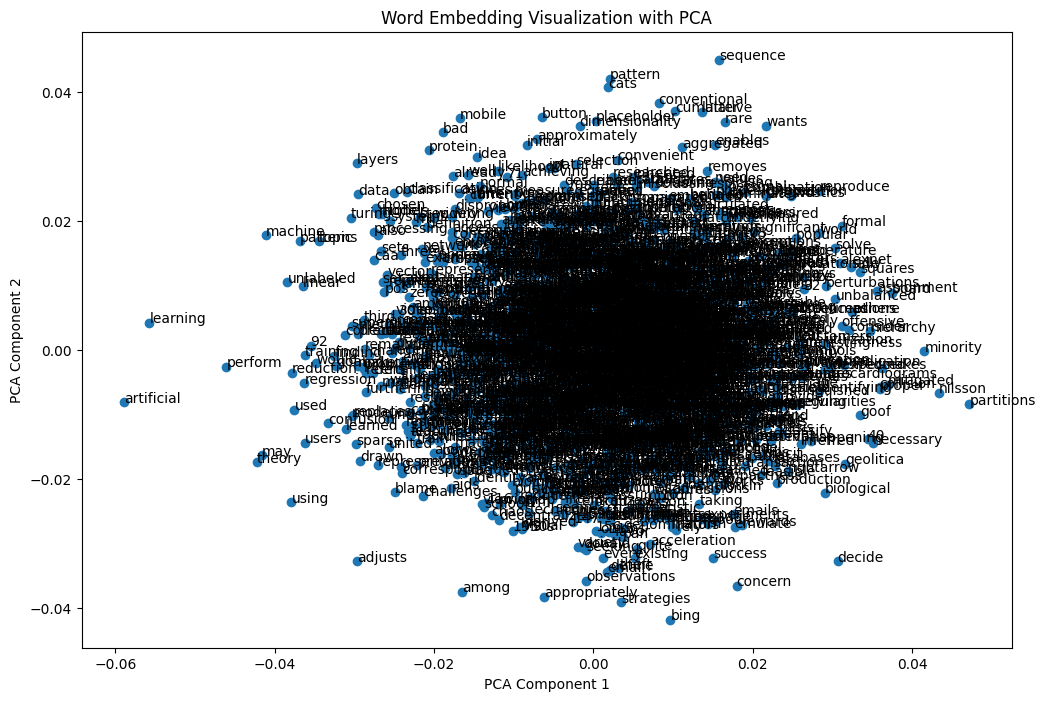

In [10]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

# Convert word vectors to a 2D array
X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Scatter plot the 2D word embeddings
plt.figure(figsize=(12, 8))
plt.scatter(result[:, 0], result[:, 1])

# Annotate points with words
words = model.wv.index_to_key
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title("Word Embedding Visualization with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
